https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('Display.max_columns', None)

In [5]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [9]:
cols_int64 = df.select_dtypes('int64').columns.to_list()
cols_float64 = df.select_dtypes('float64').columns.to_list()
df[cols_int64] = df[cols_int64].astype('int32')
df[cols_float64] = df[cols_float64].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int32  
 1   Age                        2149 non-null   int32  
 2   Gender                     2149 non-null   int32  
 3   Ethnicity                  2149 non-null   int32  
 4   EducationLevel             2149 non-null   int32  
 5   BMI                        2149 non-null   float32
 6   Smoking                    2149 non-null   int32  
 7   AlcoholConsumption         2149 non-null   float32
 8   PhysicalActivity           2149 non-null   float32
 9   DietQuality                2149 non-null   float32
 10  SleepQuality               2149 non-null   float32
 11  FamilyHistoryAlzheimers    2149 non-null   int32  
 12  CardiovascularDisease      2149 non-null   int32  
 13  Diabetes                   2149 non-null   int32

In [11]:
df.drop(columns = ['PatientID', 'DoctorInCharge'], inplace = True)

In [13]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

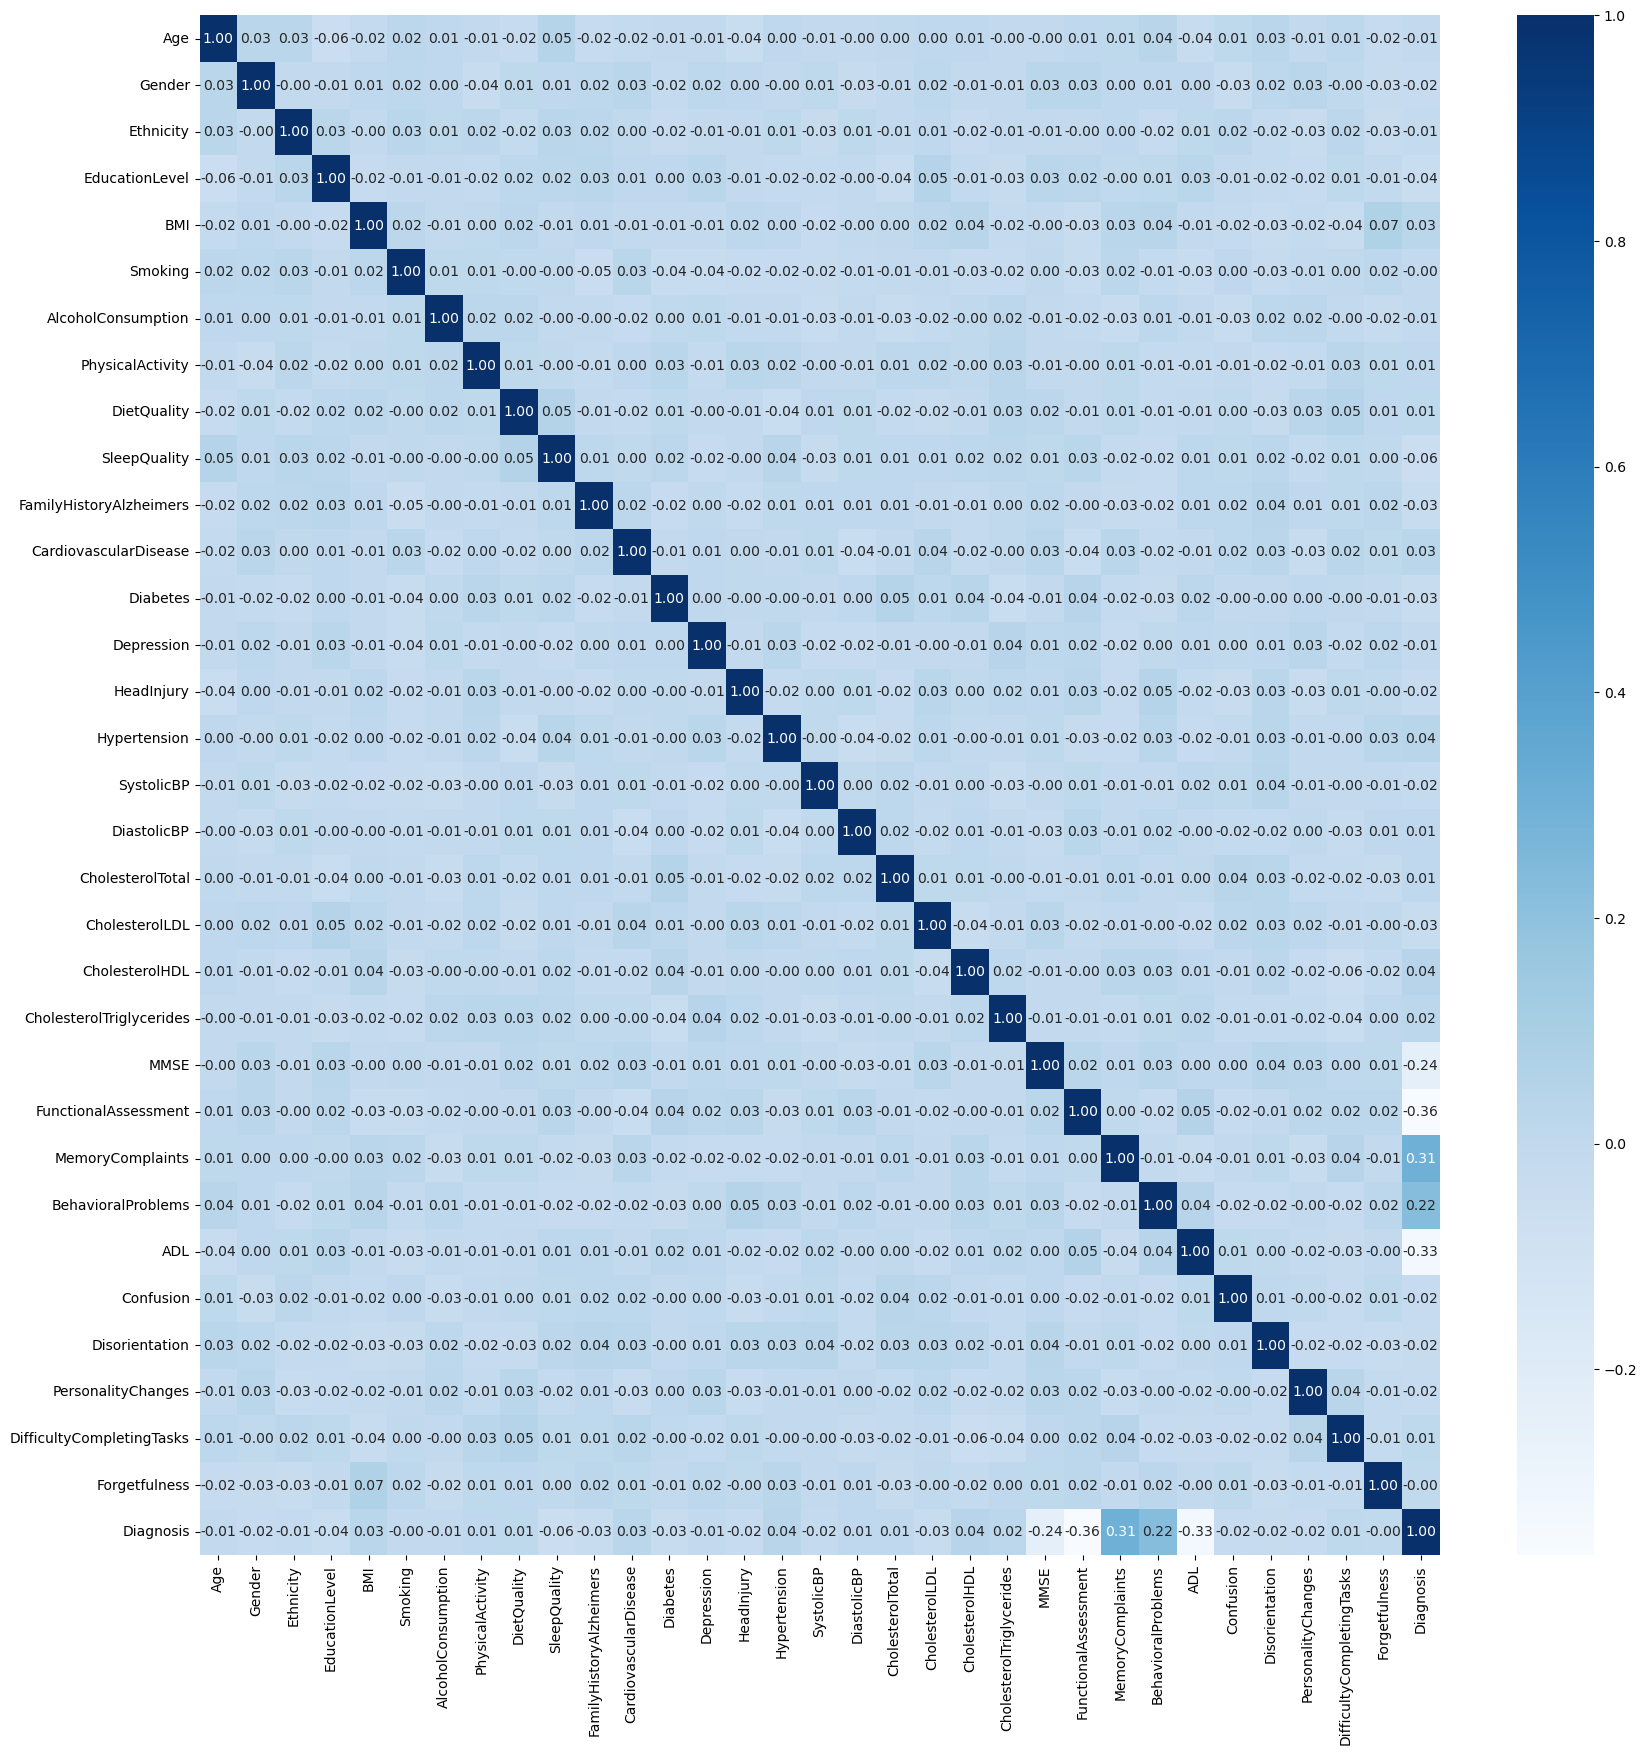

In [19]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

In [21]:
len(df.columns)

33

In [35]:
useful_cols = [col for col in df.columns.to_list() if np.abs(df.corr().loc['Diagnosis', col]) >= 0.04]

In [37]:
useful_cols

['EducationLevel',
 'SleepQuality',
 'CholesterolHDL',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Diagnosis']

In [59]:
dft = df[useful_cols].copy()
dft.head()

,EducationLevel,SleepQuality,CholesterolHDL,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,2,9.025679,33.682564,21.463531,6.518877,0,0,1.725883,0
1,0,7.151293,79.028481,20.613268,7.118696,0,0,2.592424,0
2,1,9.673574,69.772293,7.356249,5.895077,0,0,7.119548,0
3,1,8.392553,68.457489,13.991127,8.965106,0,1,6.481226,0
4,0,5.597238,56.874306,13.517609,6.045039,0,0,0.014691,0


<Axes: xlabel='EducationLevel', ylabel='Diagnosis'>

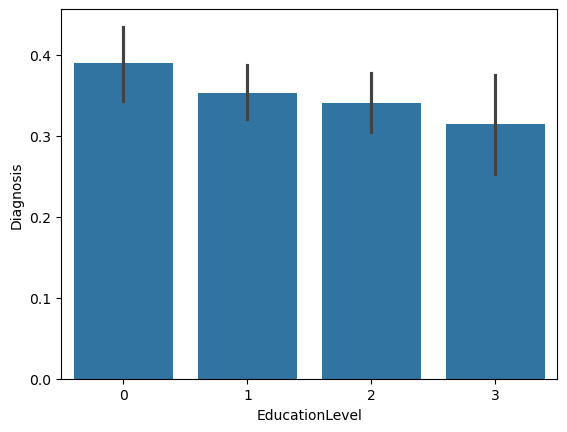

In [61]:
sns.barplot(x = df['EducationLevel'], y = df['Diagnosis'])

IndexError: index 8 is out of bounds for axis 0 with size 8

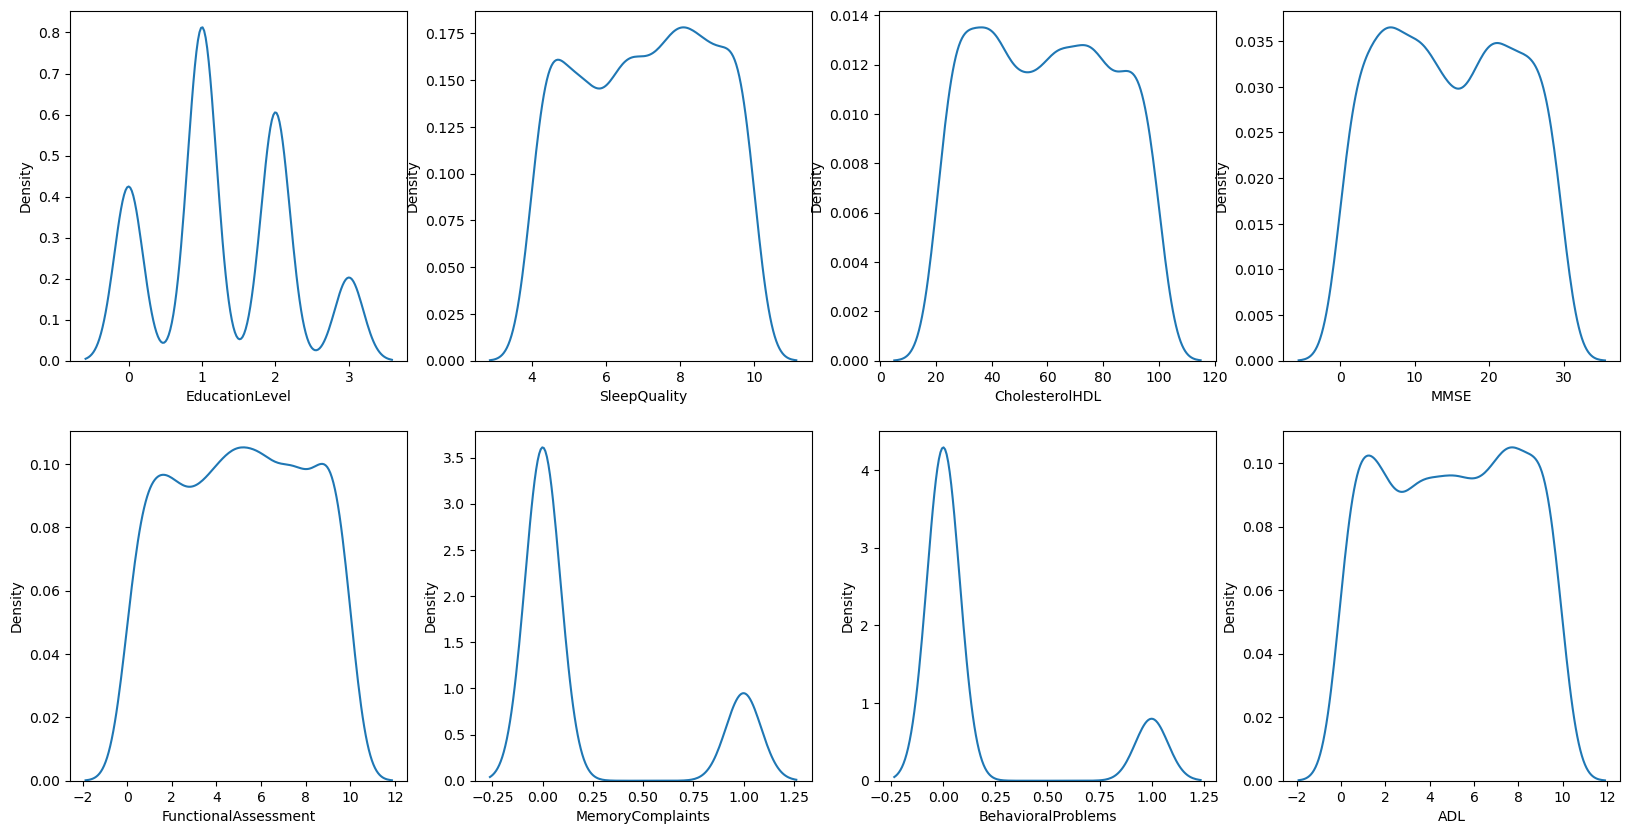

In [63]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
cols = dft.columns.to_list()
axis = axis.flatten()
for i, col in enumerate(cols):
    sns.kdeplot(x = dft[col], ax = axis[i])

plt.tight_layout()
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

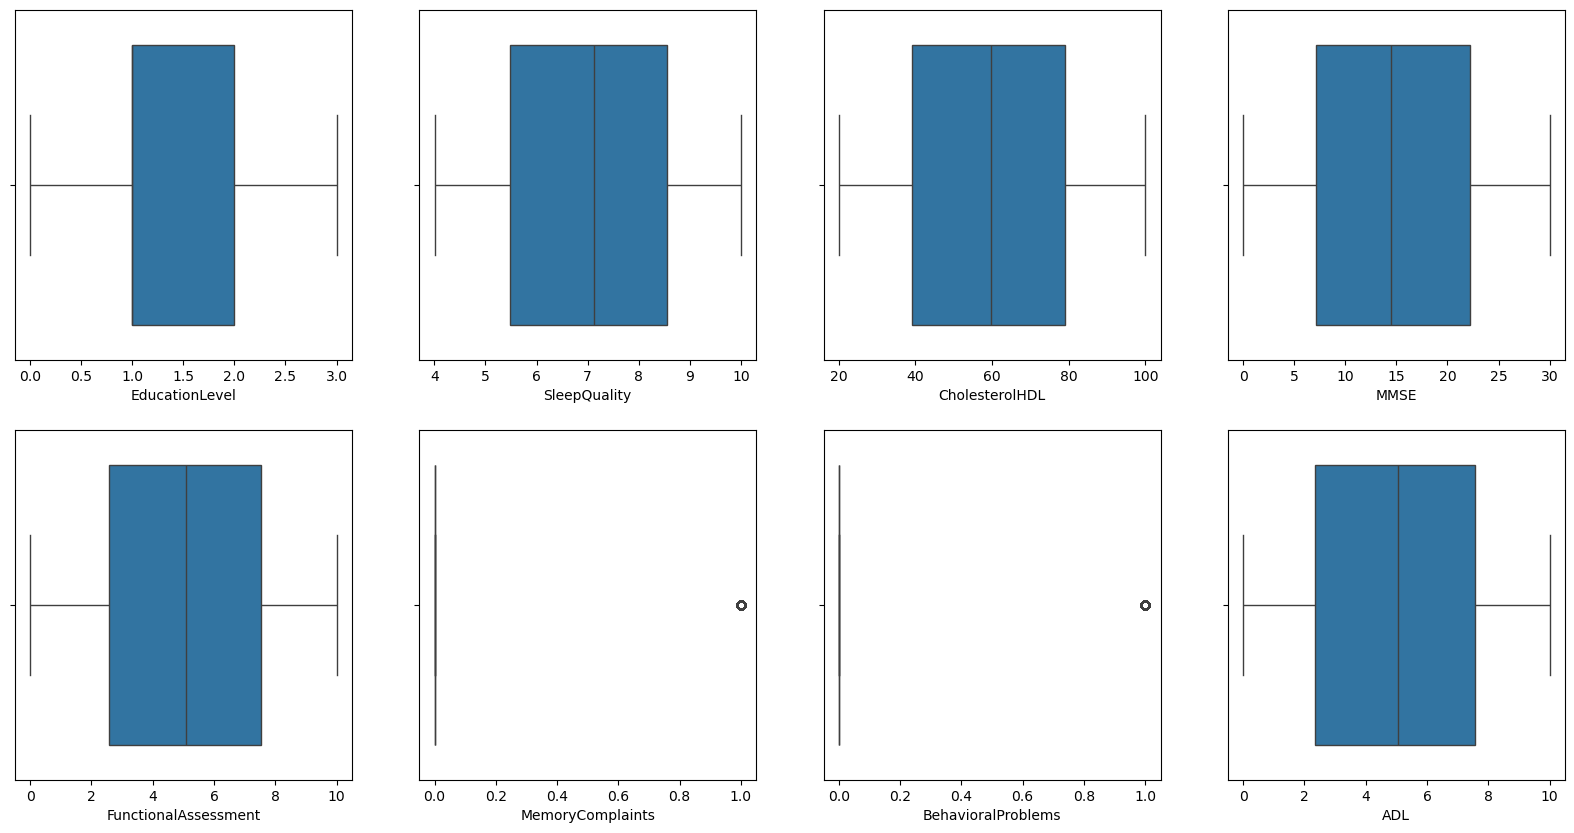

In [69]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axis = axis.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x = dft[col], ax = axis[i])

plt.tight_layout()
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [169]:
from sklearn.model_selection import train_test_split
X = dft.drop('Diagnosis', axis = 'columns')
y = dft['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [171]:
mms = MinMaxScaler()
X_traint = mms.fit_transform(X_train)
X_testt = mms.transform(X_test)

In [181]:
dfa = df[useful_cols + ['Confusion', 'Diabetes']]
Xa = dfa.drop("Diagnosis", axis = 'columns')
ya = dfa['Diagnosis']
X_traina, X_testa, y_traina, y_testa = train_test_split(Xa, ya, random_state = 22, test_size = 0.2)

In [185]:
def objective(trial):
    # Define hyperparameters to be tuned
    param = {
        'objective': 'binary:logistic',
        'verbosity': 0,
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',  # Use GPU if available
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.7, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 1.0]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True)
    }
    
    # Create the XGBClassifier model
    model = XGBClassifier(**param)

    # Train the model
    model.fit(X_traina, y_traina)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_traina, y_traina, cv=3, scoring='f1')
    return score.max()

In [187]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# Print and return the best hyperparameters
best_params = study.best_params
print('Best hyperparameters: ', best_params)

[I 2024-07-31 18:43:46,230] A new study created in memory with name: no-name-cef61c09-950e-4663-bbe5-6829dd20a18b
[I 2024-07-31 18:43:50,493] Trial 0 finished with value: 0.916256157635468 and parameters: {'lambda': 5.330884383547381e-05, 'alpha': 0.39784236340638873, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.07431188579339545, 'n_estimators': 491, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 0.25269264262265045}. Best is trial 0 with value: 0.916256157635468.
[I 2024-07-31 18:43:56,247] Trial 1 finished with value: 0.9226932668329177 and parameters: {'lambda': 3.531981549691257e-07, 'alpha': 0.012267842480363288, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.0143564422840711, 'n_estimators': 751, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 2.1504958147742821e-07}. Best is trial 1 with value: 0.9226932668329177.
[I 2024-07-31 18:44:00,495] Trial 2 finished with value: 0.918918918918919 and parameters: {'lambda': 1.4766296639006782e-05, 'alpha'

Best hyperparameters:  {'lambda': 0.0032133258917712393, 'alpha': 0.006521294346628368, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.015891586090581493, 'n_estimators': 403, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.0036388231052044244}


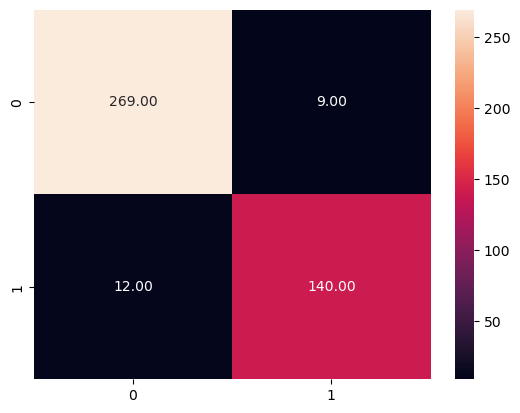

In [189]:
best_params_xgba = best_params
model = XGBClassifier(**best_params_xgba)
model.fit(X_traina, y_traina)
sns.heatmap(confusion_matrix(y_testa, model.predict(X_testa)), annot = True, fmt = '.2f')
plt.show()

Learning rate set to 0.012984
0:	learn: 0.6775249	total: 7.21ms	remaining: 7.2s
1:	learn: 0.6615246	total: 10.7ms	remaining: 5.33s
2:	learn: 0.6445659	total: 14.1ms	remaining: 4.7s
3:	learn: 0.6291954	total: 17.5ms	remaining: 4.37s
4:	learn: 0.6145167	total: 21.4ms	remaining: 4.27s
5:	learn: 0.6002795	total: 24.8ms	remaining: 4.11s
6:	learn: 0.5869644	total: 27.7ms	remaining: 3.93s
7:	learn: 0.5731273	total: 31ms	remaining: 3.85s
8:	learn: 0.5600287	total: 34.1ms	remaining: 3.75s
9:	learn: 0.5464874	total: 37.4ms	remaining: 3.71s
10:	learn: 0.5344973	total: 40.6ms	remaining: 3.65s
11:	learn: 0.5224503	total: 43.9ms	remaining: 3.62s
12:	learn: 0.5114911	total: 47.1ms	remaining: 3.57s
13:	learn: 0.5017699	total: 50.4ms	remaining: 3.55s
14:	learn: 0.4904217	total: 53.3ms	remaining: 3.5s
15:	learn: 0.4800390	total: 56.8ms	remaining: 3.5s
16:	learn: 0.4713634	total: 60.4ms	remaining: 3.5s
17:	learn: 0.4620894	total: 63.6ms	remaining: 3.47s
18:	learn: 0.4529298	total: 67ms	remaining: 3.46s
1

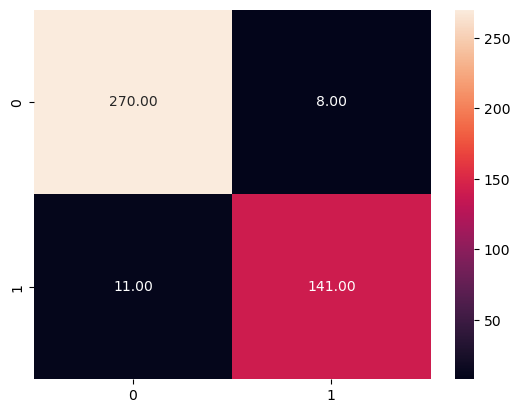

In [191]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_traina, y_traina)
sns.heatmap(confusion_matrix(y_testa, cbc.predict(X_testa)), annot = True, fmt = '.2f')
plt.show()

<Axes: >

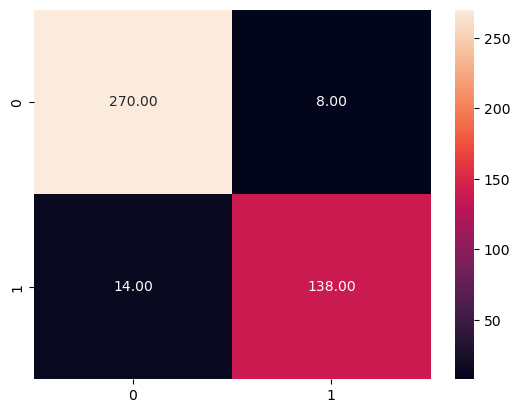

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, rfr.predict(X_testt)), annot = True, fmt = '.2f')

In [97]:
from imblearn.ensemble import BalancedRandomForestClassifier

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` t

<Axes: >

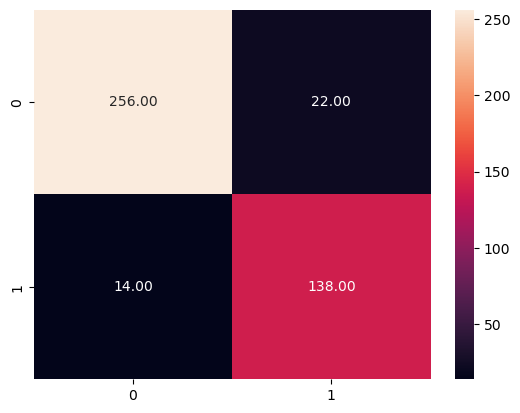

In [103]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(estimator = BalancedRandomForestClassifier(n_jobs = -1), n_estimators = 50)
abc.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, abc.predict(X_testt)), annot = True, fmt = '.2f')

In [107]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(abc, X_train, y_train, cv = 10, scoring = 'f1', n_jobs = -1)
cvs

array([0.84552846, 0.86440678, 0.92063492, 0.85714286, 0.87301587,
       0.86885246, 0.89393939, 0.84552846, 0.87301587, 0.88372093])

In [109]:
from xgboost import XGBClassifier
import optuna

In [113]:
def objective(trial):
    # Define hyperparameters to be tuned
    param = {
        'objective': 'binary:logistic',
        'verbosity': 0,
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',  # Use GPU if available
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.7, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 1.0]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True)
    }
    
    # Create the XGBClassifier model
    model = XGBClassifier(**param)

    # Train the model
    model.fit(X_traint, y_train)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_traint, y_train, cv=3, scoring='f1')
    return score.max()

In [115]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# Print and return the best hyperparameters
best_params = study.best_params
print('Best hyperparameters: ', best_params)

[I 2024-07-31 17:00:14,655] A new study created in memory with name: no-name-9bd9a468-438c-4774-99f3-43068c0f5aa9
[I 2024-07-31 17:00:18,713] Trial 0 finished with value: 0.9287469287469288 and parameters: {'lambda': 0.49528294065329964, 'alpha': 0.6155402944133231, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01589080407261745, 'n_estimators': 576, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 0.40445963100070853}. Best is trial 0 with value: 0.9287469287469288.
[I 2024-07-31 17:00:28,513] Trial 1 finished with value: 0.9135802469135802 and parameters: {'lambda': 0.000919648444310528, 'alpha': 0.0034228247580028147, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.013121822625292797, 'n_estimators': 981, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.0027302644305776252}. Best is trial 0 with value: 0.9287469287469288.
[I 2024-07-31 17:00:33,556] Trial 2 finished with value: 0.9135802469135802 and parameters: {'lambda': 0.14509700380504947, 'alpha': 

Best hyperparameters:  {'lambda': 4.70940634995827e-06, 'alpha': 0.11846502909586883, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.013925787778504098, 'n_estimators': 516, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.00047538906571454405}


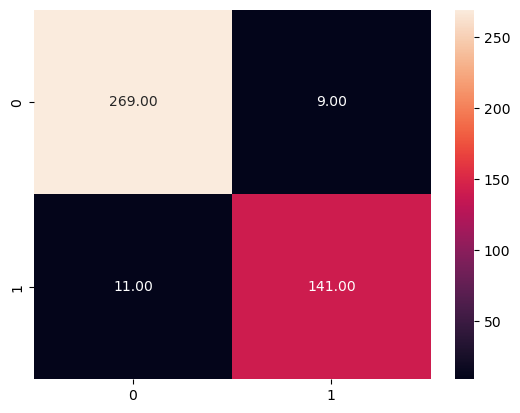

In [119]:
best_params_xgb = best_params
model = XGBClassifier(**best_params_xgb)
model.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, model.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

Learning rate set to 0.012984
0:	learn: 0.6754674	total: 59ms	remaining: 59s
1:	learn: 0.6591940	total: 62.6ms	remaining: 31.3s
2:	learn: 0.6440660	total: 65.9ms	remaining: 21.9s
3:	learn: 0.6287836	total: 69.1ms	remaining: 17.2s
4:	learn: 0.6136022	total: 72.1ms	remaining: 14.3s
5:	learn: 0.5989079	total: 74.7ms	remaining: 12.4s
6:	learn: 0.5863674	total: 77.3ms	remaining: 11s
7:	learn: 0.5736742	total: 79.7ms	remaining: 9.88s
8:	learn: 0.5609012	total: 81.8ms	remaining: 9.01s
9:	learn: 0.5489130	total: 83.9ms	remaining: 8.3s
10:	learn: 0.5365621	total: 85.9ms	remaining: 7.72s
11:	learn: 0.5252583	total: 87.8ms	remaining: 7.23s
12:	learn: 0.5134775	total: 89.7ms	remaining: 6.81s
13:	learn: 0.5022917	total: 92ms	remaining: 6.48s
14:	learn: 0.4922517	total: 94.2ms	remaining: 6.19s
15:	learn: 0.4828240	total: 96.6ms	remaining: 5.94s
16:	learn: 0.4731766	total: 98.8ms	remaining: 5.71s
17:	learn: 0.4635839	total: 101ms	remaining: 5.51s
18:	learn: 0.4536768	total: 103ms	remaining: 5.33s
19:

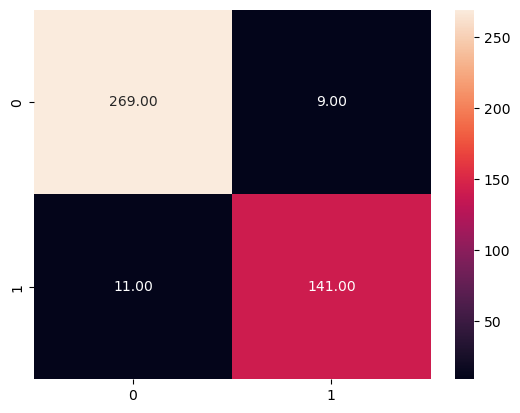

In [121]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, cbc.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.012984
0:	learn: 0.6750941	total: 3.17ms	remaining: 3.17s
1:	learn: 0.6577871	total: 5.63ms	remaining: 2.81s
2:	learn: 0.6412239	total: 7.86ms	remaining: 2.61s
3:	learn: 0.6241987	total: 10.3ms	remaining: 2.57s
4:	learn: 0.6083241	total: 13ms	remaining: 2.58s
5:	learn: 0.5931845	total: 15.8ms	remaining: 2.62s
6:	learn: 0.5783167	total: 18.3ms	remaining: 2.6s
7:	learn: 0.5640408	total: 20.7ms	remaining: 2.57s
8:	learn: 0.5507591	total: 23.5ms	remaining: 2.58s
9:	learn: 0.5373179	total: 25.8ms	remaining: 2.56s
10:	learn: 0.5244870	total: 28.3ms	remaining: 2.54s
11:	learn: 0.5120790	total: 31.2ms	remaining: 2.57s
12:	learn: 0.5004059	total: 33.5ms	remaining: 2.54s
13:	learn: 0.4891584	total: 35.6ms	remaining: 2.51s
14:	learn: 0.4782961	total: 37.9ms	remaining: 2.49s
15:	learn: 0.4679022	total: 40.1ms	remaining: 2.47s
16:	learn: 0.4574342	total: 42.4ms	remaining: 2.45s
17:	learn: 0.4478146	total: 44.9ms	remaining: 2.45s
18:	learn: 0.4380116	total: 47.1ms	remaining: 2

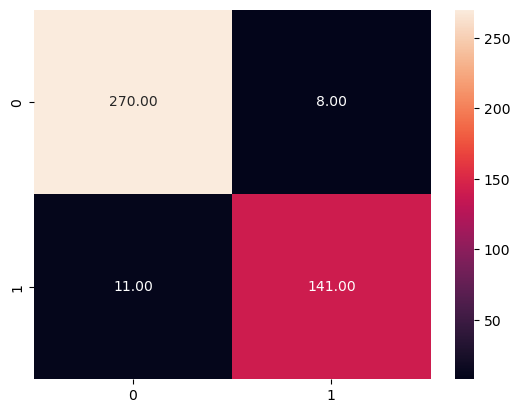

In [123]:
abc_cat = AdaBoostClassifier(estimator = CatBoostClassifier(), n_estimators = 50)
abc_cat.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, abc_cat.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

In [127]:
from sklearn.ensemble import BaggingClassifier

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


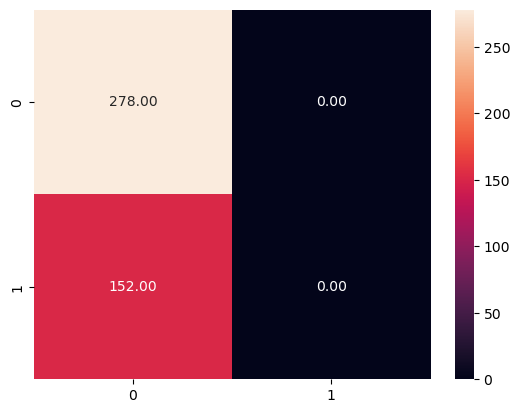

In [125]:
abc_xgb = AdaBoostClassifier(estimator = XGBClassifier(**best_params_xgb), n_estimators = 50)
abc_xgb.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, abc_xgb.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

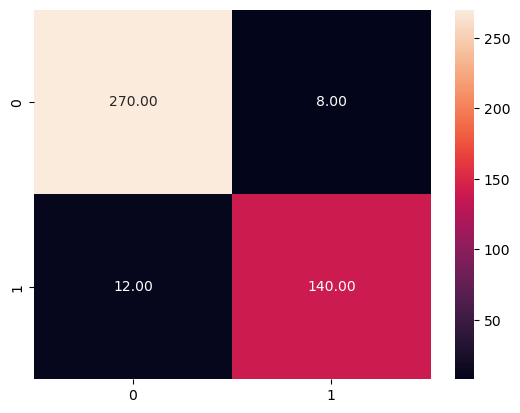

In [129]:
bc_xgb = BaggingClassifier(estimator = XGBClassifier(**best_params_xgb), n_estimators = 100)
bc_xgb.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, bc_xgb.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

In [131]:
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier

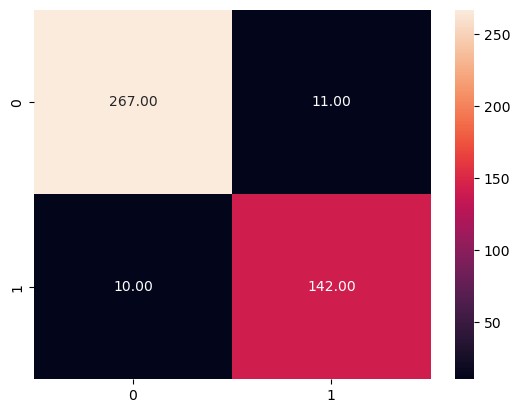

In [133]:
eec = EasyEnsembleClassifier(n_estimators = 40, estimator = CatBoostClassifier(), n_jobs = -1)
eec.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, eec.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

In [231]:
import pickle as pkl
pkl.dump(eec, open('best_model_31.pkl', 'wb'))
pkl.dump(mms, open('MinMaxScaler.pkl', 'wb'))

In [149]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841


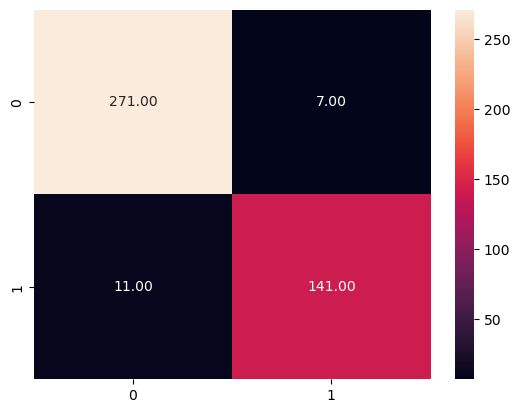

In [159]:
estimators = [
    ('eec', EasyEnsembleClassifier(n_estimators = 40, estimator = CatBoostClassifier(), n_jobs = -1)),
    ('rusboost', RUSBoostClassifier(n_estimators = 40, estimator = XGBClassifier(**best_params_xgb))),
    ('bbc', BalancedBaggingClassifier(n_estimators = 30, estimator = LogisticRegressionCV(), n_jobs = -1)),
    ('rfr', RandomForestClassifier(n_jobs = -1))
]

sc = StackingClassifier(estimators = estimators, final_estimator = LGBMClassifier())
sc.fit(X_traint, y_train)
sns.heatmap(confusion_matrix(y_test, sc.predict(X_testt)), annot = True, fmt = '.2f')
plt.show()

In [227]:
from sklearn.ensemble import ExtraTreesClassifier

[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841


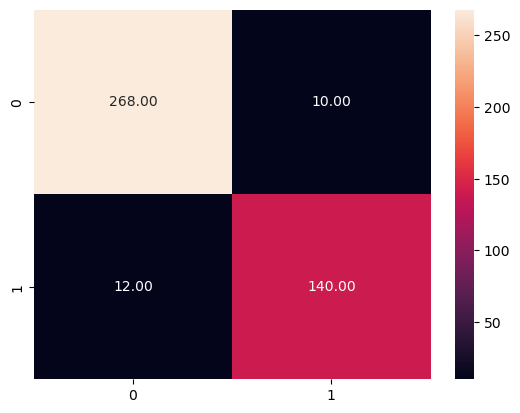

In [229]:
estimators = [
    ('eec', EasyEnsembleClassifier(n_estimators = 40, estimator = CatBoostClassifier(), n_jobs = -1)),
    ('rusboost', RUSBoostClassifier(n_estimators = 40, estimator = XGBClassifier(**best_params_xgb))),
    ('rfr', RandomForestClassifier(n_jobs = -1)),
    ('etc', ExtraTreesClassifier(n_jobs = -1))
]

sca = StackingClassifier(estimators = estimators, final_estimator = LGBMClassifier())
sca.fit(X_traina, y_traina)
sns.heatmap(confusion_matrix(y_testa, sca.predict(X_testa)), annot = True, fmt = '.2f')
plt.show()

E:\Anaconda\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


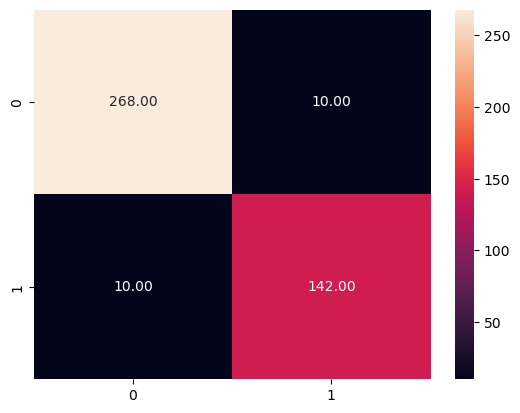

In [195]:
eec2 = EasyEnsembleClassifier(n_estimators = 40, estimator = CatBoostClassifier(), n_jobs = -1)
eec2.fit(X_traina, y_traina)
sns.heatmap(confusion_matrix(y_testa, eec2.predict(X_testa)), annot = True, fmt = '.2f')
plt.show()

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

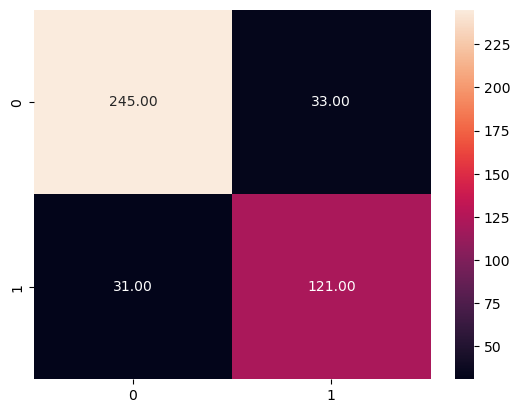

In [223]:
lr = LogisticRegressionCV(solver = 'lbfgs', scoring = 'f1')
lr.fit(X_traina, y_traina)
sns.heatmap(confusion_matrix(y_testa, lr.predict(X_testa)), annot = True, fmt = '.2f')
plt.show()